# Convolution of an Image with Mean filter 

In [3]:
import cv2
import matplotlib.pyplot as plt
from scipy.signal import convolve2d

Image after applying Gaussian Noise


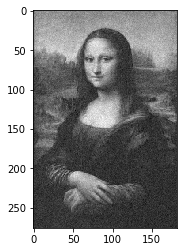

In [12]:
import cv2
import matplotlib.pyplot as plt
from scipy.signal import convolve2d
%matplotlib inline

img = cv2.imread('monalisa.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # BGR->gray로 변환
plt.imshow(gray,cmap='gray')
mean = 0
var = 100
sigma = var**0.5
row,col = np.shape(gray)
gauss = np.random.normal(mean,sigma,(row,col))
gauss = gauss.reshape(row,col)
gray_noisy = gray + gauss
print "Image after applying Gaussian Noise"
plt.imshow(gray_noisy,cmap='gray')


Image after convolving with Mean filter


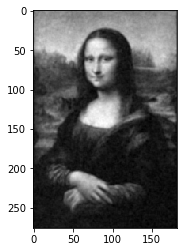

In [21]:
## Mean filter
Hm = np.array([[1,1,1],[1,1,1],[1,1,1]])/float(9)
Gm = convolve2d(gray_noisy,Hm,mode='same')
plt.imshow(Gm,cmap='gray') 
print "Image after convolving with Mean filter"

# Listing 3-3. Median Filter illustration

A 2D Median filter replaces each pixel in a neighborhood with the median pixel intensity in that neighborhood based on the filter size. 
* 2D Median 필터는 필터 크기에 따라 인접 영역의 각 픽셀을 중앙의 픽셀 세기로 바꿉니다.
* 중간값 필터(median filter)는 비선형 디지털 필터 기술로 이미지나 기타 신호로부터 신호 잡음을 제거하는 데 자주 이용되며, 통상적으로 이미지 프로세싱에서 윤곽선 감지 같은 높은 수준의 처리를 수행하기 전 단계인 이미지에 고성능 잡음 제거를 수행하는 데 필요하다.
* 중간값 필터는 이미지 프로세싱에서 자주 이용되며, 특히 스펙클 노이즈나 작은 반점들을 줄이는 데 유용하다. 중간값 필터의 윤곽선 보호 성질은 원치 않는 윤곽선 번짐이 있는 경우에 유용하다.

The Median filter is good for removing salt and pepper noise.
* Median filter는 잡음 제거하는 데 좋다.
* camera 기술에선 Gaussian Nosie, salt-and-pepper Noise(점잡음), Shot Noise, Uniform Noise와 같은 다양한 Noise가 발생하여 영상이나 이미지의 품질을 떨어뜨린다.
* 점잡음 (Salt and pepper noise)은 일반적으로 이미지에 생성되는 노이즈의 한 종류이다. 점잡음이 발생한 이미지에는 무작위적인 희고 검은 점이 나타나게 된다. 일반적으로 이 잡음을 줄이기 위해서는 중간값 필터(Median Filter)를 사용한다.
* 참고 : http://blog.naver.com/PostView.nhn?blogId=laonple&logNo=220811027599&categoryNo=30&parentCategoryNo=0&viewDate=&currentPage=1&postListTopCurrentPage=1&from=postView


This type of noise presents itself in the images in the form of black and white pixels and is generally caused by sudden disturbances while capturing the images.
* 이러한 유형의 노이즈는 검은색과 흰색 픽셀의 형태로 영상에 나타나며 일반적으로 이미지를 캡처하는 동안 갑작스러운 장애로 인해 발생합니다. 

Listing 3-3 illustrates how salt and pepper noise can be added to an image and then how the noise can be suppressed using a Median filter.
* 3-3 예제는 이미지에 salt-and-pepper 노이즈를 추가하는 방법과 중위 필터를 사용하여 노이즈를 억제하는 방법을 보여줍니다.

Image after applying Salt and Pepper Noise


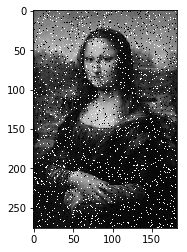

In [22]:
#----------------------------------------------------------------------------------------
## First create an image with Salt and Pepper Noise 
#----------------------------------------------------------------------------------------
## Generate random integers from 0 to 20
## If the value is zero we will replace the image pixel with a low value of 0 that corresponds to a black pixel
## If the value is 20 we will replace the image pixel with a high value of 255 that correspondsa to a white pixel
## Since we have taken 20 intergers and out of which we will only tag integers 1 and 20 as salt and pepper noise
## hence we would have approximately 10% of the overall pixels as salt and pepper noise. If we want to reduce it
## to 5 % we can taken integers from 0 to 40 and then treat 0 as indicator for black pixel and 40 as an indicator for white pixel.

## salt and Pepper Noise 이미지 생성
#----------------------------------------------------------------------------------------
## 0부터 20까지의 임의의 정수 생성
## 값이 0이면 이미지 픽셀을 검은색 픽셀에 해당하는 낮은 값 0으로 바꿉니다.
## 값이 20이면 이미지 픽셀을 흰색 픽셀에 해당하는 255의 높은 값으로 바꿉니다.
# 20개의 정수를 취했으므로 정수 1과 20에만 salt-and-pepper noise를 붙일 것입니다
## 따라서 우리는 전체 픽셀의 약 10%를 salt-and-pepper noise로 가질 것입니다.
# 이 값을 5 %로 줄이려면 0에서 40까지의 정수를 취한 다음 검정 픽셀의 경우 0을, 흰색 픽셀의 경우 40을 처리합니다.


np.random.seed(0)

gray_sp = gray*1  # gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # BGR->gray로 변환
sp_indices = np.random.randint(0,21,[row,col]) # numpy.random.randint(low, high=None, size=None)
#이산형 균등분포(discrete uniform distribution)으로 부터 정수형(integers)의 난수를 만들고 싶을때 사용.

#위의 코드 row,col = np.shape(gray)
for i in xrange(row): #파이썬 3.5xx 에는 xrange 지원안함.
    for j in xrange(col):
        if sp_indices[i,j] == 0:
            gray_sp[i,j] = 0
        if sp_indices[i,j] == 20:
            gray_sp[i,j] = 255
plt.imshow(gray_sp,cmap='gray')
print "Image after applying Salt and Pepper Noise"


Removing Salt and Pepper Noise with OpenCV Median Filter


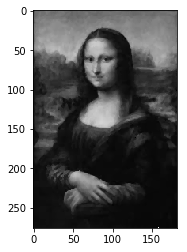

In [23]:
#-----------------------------------------------------------------------------------------------------------
# Remove the Salt and Pepper Noise 
#-----------------------------------------------------------------------------------------------------------
## Now we want to remove the salt and pepper noise through a median filter.
## Using the opencv Median Filter for the same

#-----------------------------------------------------------------------------------------------------------
# Remove the Salt and Pepper Noise 
#-----------------------------------------------------------------------------------------------------------
# Median Filter(중간 값 필터)를 통해 salt-and-pepper noise를 제거하고자 합니다.
# opencv Median Filter를 동일하게 사용하기.

gray_sp_removed = cv2.medianBlur(gray_sp,3) #CV_2로 변환했으므로 3을 지정. 3*3 픽셀을 중앙값 픽셀로 표시.
plt.imshow(gray_sp_removed,cmap='gray') #화상(image) 데이터처럼 행과 열을 가진 행렬 형태의 2차원 데이터는 imshow 명령을 써서 2차원 자료의 크기를 색깔로 표시하는 것이다.
print"Removing Salt and Pepper Noise with OpenCV Median Filter"

###
### cv2.medianBlur(src, ksize) 파라메터
###  src – 1,3,4 channel image. depth가 CV_8U, CV_16U, or CV_32F 이면 ksize는 3 또는 5, CV_8U이면 더 큰 ksize가능
###  ksize – 1보다 큰 홀수


Image produced by applying Median Filter Logic


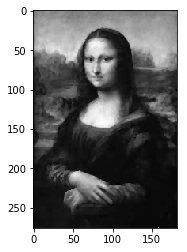

In [25]:
##Implementation of the 3x3 Median Filter without using opencv
## opencv를 사용하지 않고 3x3 Median Filter 구현하기

gray_sp_removed_exp = gray*1

for i in xrange(row):
    for j in xrange(col):
        local_arr = []
        for k in xrange(np.max([0,i-1]),np.min([i+2,row])): # 행 3 개씩. -> [0,2], [1,3], [2,4]
            for l in xrange(np.max([0,j-1]),np.min([j+2,col])): # 열 3 개씩 -> 위와 동일
                local_arr.append(gray_sp[k,l]) # 행과 열 3개씩 
                
                #ex. i,j -> [1,1] 이면 k,l은 i,j[1,1]에 해당하는 총 9개의 데이터가 local_arr에 들어가게 됨.

        gray_sp_removed_exp[i,j] = np.median(local_arr) # gray*1 에서 [i,j] 에 해당하는 것을 local_arr의 평균으로 편경.

plt.imshow(gray_sp_removed_exp,cmap='gray')
print "Image produced by applying Median Filter Logic"        
